In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasgui import show
from collections import Counter
from simulators.statistic_evaluator import roll_a_lot, RollResult, computed_chances, roll

In [2]:
skill = 75
# skill_crit = skill // 10
skill_crit = 4

card_complexity = 50
# card_crit = card_complexity // 10
card_crit = 10

count = 200000
# lane_size = 3

c = Counter()

rolls = roll_a_lot(
    skill=skill, card_complexity=card_complexity, skill_crit=skill_crit, card_crit=card_crit, count=count
)
c.update(r.roll_result for r in rolls)
estimated_stats = sorted([(i, round(c[i] / c.total() * 100.0, 2)) for i in c])
cc = computed_chances(skill, card_complexity, skill_crit, card_crit)

In [3]:
df = pd.DataFrame([(r.art_roll, r.card_roll, r.roll_result.name) for r in rolls], columns=['art', 'card','roll_result'])

In [4]:
# df

In [5]:
cat_type = pd.CategoricalDtype(categories=[str(i.name) for i in RollResult], ordered=True)

In [6]:
cat_type

CategoricalDtype(categories=['SUCCESS', 'STAY', 'FAIL', 'FAIL_AND_DAMAGE'], ordered=True, categories_dtype=object)

In [7]:
df['roll_result'] = df['roll_result'].astype(cat_type)

Estimated : [(<RollResult.SUCCESS: 1>, 57.57), (<RollResult.STAY: 2>, 23.14), (<RollResult.FAIL: 3>, 15.98), (<RollResult.FAIL_AND_DAMAGE: 4>, 3.31)]
calculated : 56.82000000000001


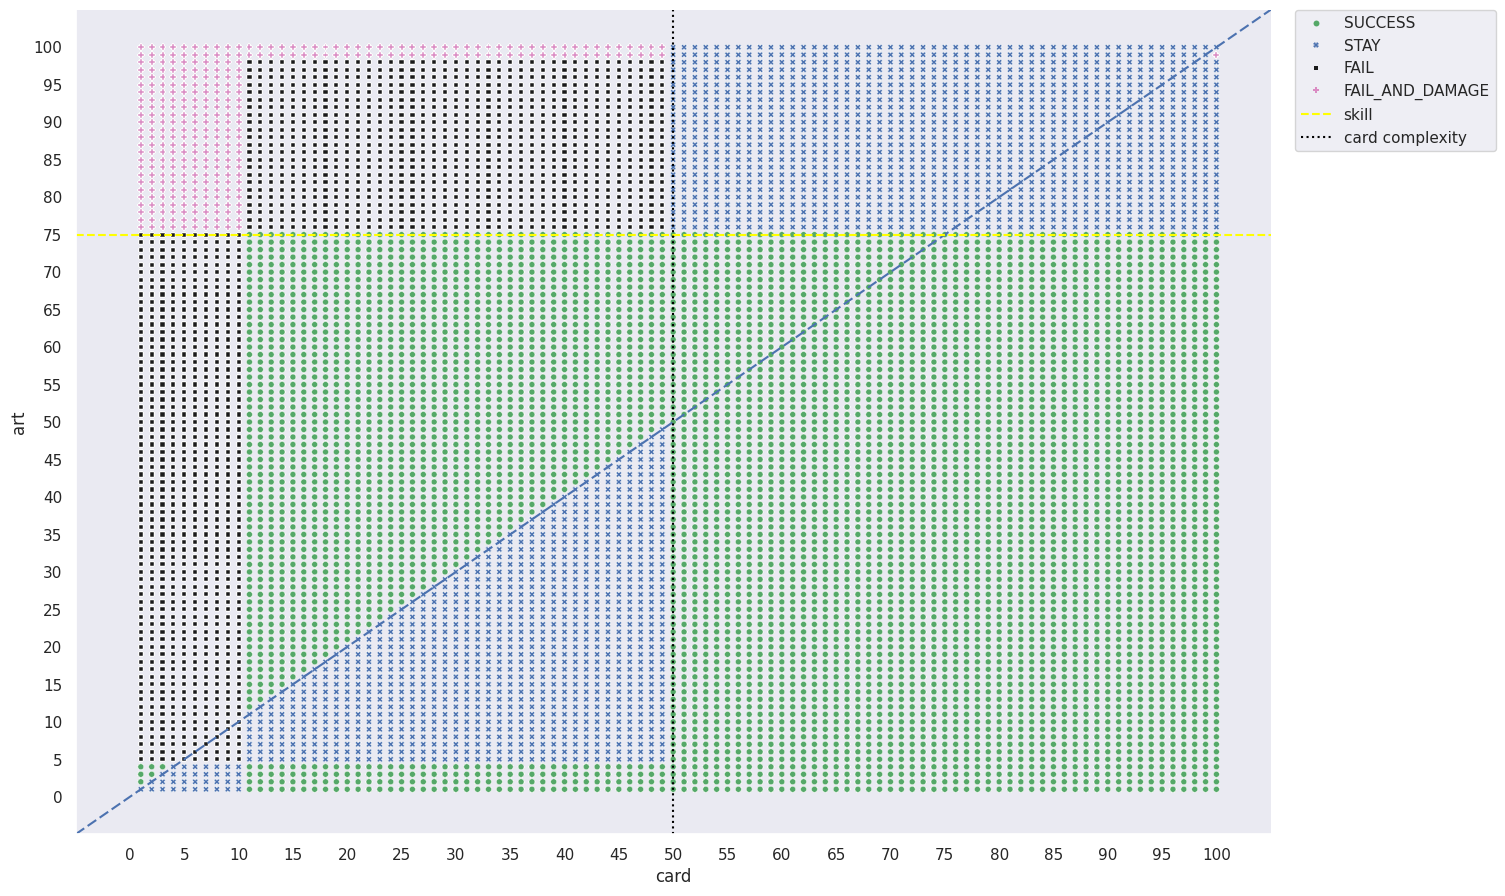

In [8]:
print(f"Estimated : {estimated_stats}")
print(f"calculated : {cc.win * 100 if cc else None}")

sns.set_theme(style="dark")
#sns.color_palette("Set1")
plot=sns.relplot(data=df, x="card", y="art", hue="roll_result", style="roll_result", s=18, palette=["C2", "C0", "k", "C6"], facet_kws=dict(legend_out=False))
plot.set(xticks=np.arange(0,101,5), yticks=np.arange(0,101,5))
plot.figure.set_size_inches(15,10)
# x=y line
plot.ax.axline(xy1=(0, 0), slope=1, color="b", dashes=(5, 2))
# skill and complexity lines
skill_line = plot.ax.axhline(y=skill, color = "yellow", linestyle = "dashed", label="skill")
complexitiy_line = plot.ax.axvline(x=card_complexity, color = "black", linestyle = "dotted", label="card complexity")
handles = [skill_line, complexitiy_line]
labels = [h.get_label() for h in handles]
plot.ax.legend(handles=handles, labels=labels, fontsize='x-small',
              loc='upper left', ncol=2, facecolor='white', framealpha=1) 
plot.ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# plot.add_legend(loc='upper center',facecolor='white', framealpha=1)


In [9]:
df2 = pd.DataFrame([(r.art_roll, r.card_roll, r.roll_result.name) for r in rolls], columns=['art', 'card','roll_result'])

In [10]:
chances = [computed_chances(skill, complexity) for skill in range(30, 100) for complexity in range(30,100)]
pd2 = pd.DataFrame(data=[chance._as_percent_dict() for chance in chances])
pd2

,skill,complexity,win,stay,fail,damage
0,3000,30,25,0,0,0
1,3000,31,25,0,0,0
2,3000,32,24,0,0,0
3,3000,33,24,0,0,0
4,3000,34,24,0,0,0
...,...,...,...,...,...,...
4895,9900,95,53,0,0,0
4896,9900,96,52,0,0,0
4897,9900,97,51,0,0,0
4898,9900,98,50,0,0,0
